<a href="https://colab.research.google.com/github/Sharvaric65/Employee_Sentiment_Analysis/blob/main/Employee_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Employee_Project/test(in).csv")
df.head()

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


In [ ]:
!ls



drive  sample_data


In [ ]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  2191 non-null   object
 1   body     2191 non-null   object
 2   date     2191 non-null   object
 3   from     2191 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB


,Subject,body,date,from
count,2191,2191,2191,2191
unique,1251,1539,690,10
top,(No Subject),\n\n,7/1/2011,lydia.delgado@enron.com
freq,141,21,9,284


In [ ]:
!pip install nltk


In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia = SentimentIntensityAnalyzer()


In [ ]:
def label_sentiment(text):
    score = sia.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"


In [ ]:
df['sentiment'] = df['body'].apply(label_sentiment)
df.head()

,Subject,body,date,from,sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,Positive
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,Neutral
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,Positive


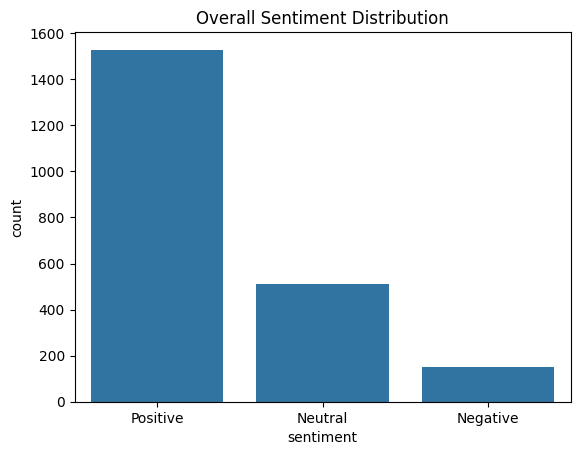

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment', data=df)
plt.title("Overall Sentiment Distribution")
plt.show()


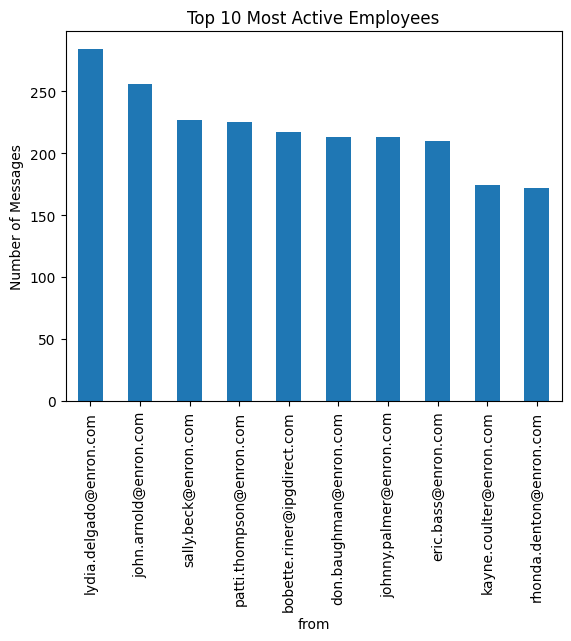

In [ ]:
df['from'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Active Employees")
plt.ylabel("Number of Messages")
plt.show()

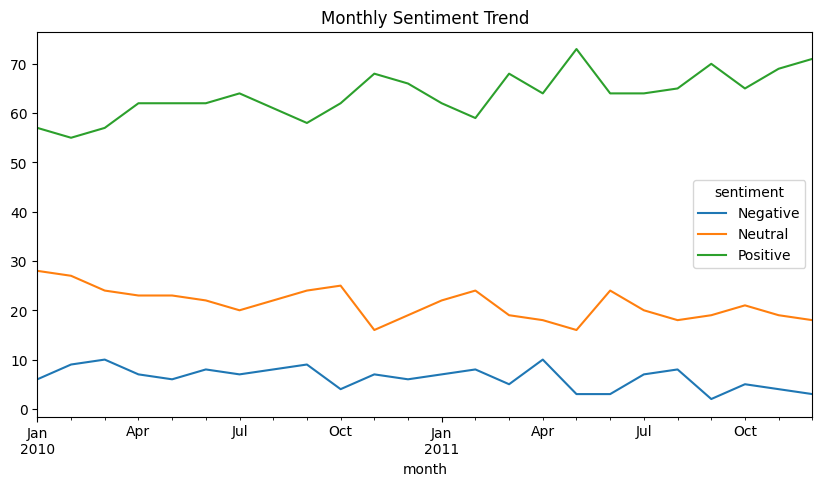

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')

monthly_sentiment = df.groupby(['month', 'sentiment']).size().unstack(fill_value=0)
monthly_sentiment.plot(figsize=(10,5))
plt.title("Monthly Sentiment Trend")
plt.show()


In [ ]:
df['sentiment_score'] = df['sentiment'].map({
    'Positive': 1,
    'Negative': -1,
    'Neutral': 0
})

df[['sentiment', 'sentiment_score']].head()


,sentiment,sentiment_score
0,Positive,1
1,Positive,1
2,Neutral,0
3,Neutral,0
4,Positive,1


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')


In [ ]:
monthly_scores = (
    df.groupby(['from', 'month'])['sentiment_score']
    .sum()
    .reset_index()
)

monthly_scores.head()

,from,month,sentiment_score
0,bobette.riner@ipgdirect.com,2010-01,1
1,bobette.riner@ipgdirect.com,2010-02,7
2,bobette.riner@ipgdirect.com,2010-03,6
3,bobette.riner@ipgdirect.com,2010-04,3
4,bobette.riner@ipgdirect.com,2010-05,2


In [ ]:
top_positive = (
    monthly_scores
    .sort_values(['month', 'sentiment_score', 'from'],
                 ascending=[True, False, True])
    .groupby('month')
    .head(3)
)

top_positive

,from,month,sentiment_score
120,kayne.coulter@enron.com,2010-01,13
48,eric.bass@enron.com,2010-01,9
144,lydia.delgado@enron.com,2010-01,9
73,john.arnold@enron.com,2010-02,11
97,johnny.palmer@enron.com,2010-02,10
...,...,...,...
94,john.arnold@enron.com,2011-11,10
22,bobette.riner@ipgdirect.com,2011-11,9
71,eric.bass@enron.com,2011-12,12
191,patti.thompson@enron.com,2011-12,12


In [ ]:
top_negative = (
    monthly_scores
    .sort_values(['month', 'sentiment_score', 'from'],
                 ascending=[True, True, True])
    .groupby('month')
    .head(3)
)

top_negative

,from,month,sentiment_score
0,bobette.riner@ipgdirect.com,2010-01,1
96,johnny.palmer@enron.com,2010-01,1
192,rhonda.denton@enron.com,2010-01,1
121,kayne.coulter@enron.com,2010-02,1
145,lydia.delgado@enron.com,2010-02,1
...,...,...,...
214,rhonda.denton@enron.com,2011-11,2
46,don.baughman@enron.com,2011-11,5
119,johnny.palmer@enron.com,2011-12,2
23,bobette.riner@ipgdirect.com,2011-12,3


In [ ]:
negative_df = df[df['sentiment'] == 'Negative'].copy()
negative_df.head()


,Subject,body,date,from,sentiment,month,sentiment_score
9,More Dallas ASE Information,The start time for Tuesday morning has been ch...,2010-02-06,kayne.coulter@enron.com,Negative,2010-02,-1
13,Re: trades,kiss my ass now bitch!\n\n\n \n\n\nFrom: Br...,2010-09-24,don.baughman@enron.com,Negative,2010-09,-1
17,RE: Southern Union Galveston/Pt. Arthur,She's probably fucking wrong!\n,2010-07-07,sally.beck@enron.com,Negative,2010-07,-1
26,FW: Tahoe,I forgot to mention that if you do not buy the...,2010-11-06,don.baughman@enron.com,Negative,2010-11,-1
42,Re: GAME WEDNEDSDAY @ 7:00,"now, now - you didn't look that great against ...",2011-08-15,sally.beck@enron.com,Negative,2011-08,-1


In [ ]:
negative_df = negative_df.sort_values(['from', 'date'])

In [ ]:
# Assuming negative_df is already sorted by ['from', 'date']
# (This was done in cell Xgz9ikKsHzlp)

# 1. Reset the index of negative_df to temporarily store the original index as a column
negative_df_reset = negative_df.reset_index()

# 2. Calculate the rolling 30-day count of negative messages per employee.
#    The result `rolling_counts_series` will have a MultiIndex (from, date) based on kernel output.
rolling_counts_series = (
    negative_df_reset
    .groupby('from')
    .rolling('30D', on='date')
    ['date'].count() # Count entries in the 'date' column within each window
    .rename('neg_count_30d') # Rename the series for clarity
)

# 3. Convert this MultiIndexed Series to a DataFrame to make 'from' and 'date' regular columns
rolling_counts_df = rolling_counts_series.reset_index()

# 4. Merge `rolling_counts_df` back to `negative_df_reset` using 'from' and 'date' as keys.
#    This correctly assigns the rolling count to each message row.
merged_df = negative_df_reset.merge(
    rolling_counts_df[['from', 'date', 'neg_count_30d']],
    on=['from', 'date'],
    how='left' # Use a left merge to keep all rows from negative_df_reset
)

# 5. Assign the new 'neg_count_30d' column back to the original `negative_df`,
#    aligning by the 'index' column (which holds the original index).
negative_df['neg_count_30d'] = merged_df.set_index('index')['neg_count_30d']

In [ ]:
flight_risk_employees = negative_df[
    negative_df['neg_count_30d'] >= 4
]['from'].unique()

flight_risk_employees


array(['bobette.riner@ipgdirect.com', 'don.baughman@enron.com',
       'johnny.palmer@enron.com', 'sally.beck@enron.com'], dtype=object)

In [ ]:
df['message_length'] = df['body'].astype(str).apply(len)

monthly_features = (
    df.groupby(['from', 'month'])
    .agg(
        message_count=('body', 'count'),
        avg_message_length=('message_length', 'mean'),
        sentiment_score=('sentiment_score', 'sum')
    )
    .reset_index()
)

monthly_features.head()


,from,month,message_count,avg_message_length,sentiment_score
0,bobette.riner@ipgdirect.com,2010-01,2,115.000000,1
1,bobette.riner@ipgdirect.com,2010-02,14,295.714286,7
2,bobette.riner@ipgdirect.com,2010-03,11,286.181818,6
3,bobette.riner@ipgdirect.com,2010-04,6,226.500000,3
4,bobette.riner@ipgdirect.com,2010-05,4,172.250000,2


In [ ]:
from sklearn.model_selection import train_test_split

X = monthly_features[['message_count', 'avg_message_length']]
y = monthly_features['sentiment_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 3.3496574465159115
R2 Score: 0.7183250937343457


In [ ]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coef_df


,Feature,Coefficient
0,message_count,0.624272
1,avg_message_length,0.002342


In [ ]:
# No environment variables required for this project


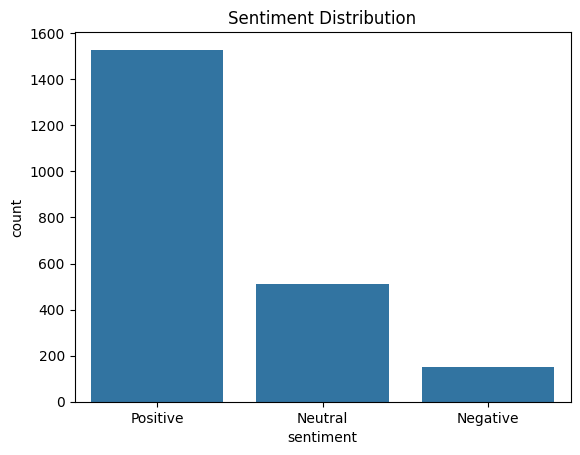

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")

# Create the directory if it doesn't exist
os.makedirs('visualizations', exist_ok=True)

plt.savefig("visualizations/sentiment_distribution.png")
plt.show()